그런즉 너희가 먹든지 마시든지 무엇을 하든지 다 하나님의 영광을 위하여 하라 (고전10:31)

----
<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/bannergreen.png?raw=true" width=1000></center>

**NOTE:** The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

# Image Processing using Machine Learning

이번 자료에서는 머신러닝을 사용하여 영상처리 분야에 적용해보는 실습을 진행하도록 하겠습니다.
~~~
1. 영상처리란 무엇인가?
2. Image Segmentation이란?
3. Evaluation Metric in Image Segmentation
4. Semantic Segmentation using machine learning
5. 실습
~~~

# 영상처리란 무엇인가?

지난 코드랩 (IP_classfication.ipynb)에서 배운 내용을 간단하게 복습하도록 하겠습니다.  
먼저, 위키피디아에서 정의하는 영상처리는 다음과 같습니다.  
_영상 처리(Image processing) 또는 화상 처리는 넓게는 입출력이 영상인 모든 형태의 정보 처리를 가리키며, 사진이나 동영상을 처리하는 것이 대표적인 예이다._

먼저 영상처리란 컴퓨터비전 분야에서 주로 다루어지는 task/field 입니다. 이때 영상이란 image를 의미하고, video는 동영상이라고 부릅니다. 영상처리를 가장 쉽게 설명하라고 한다면 아마 '포토샵'을 떠올리시면 쉽게 이해할 수 있을 것 같습니다. 아마 모두들 포토샵을 사용하여 인물 사진에서 잡티와 여드름을 제거하고, 주름을 없애거나 더 깔끔한 피부톤으로 만드는 등의 과정을 거치는 모습을 본적이 있을 것입니다. 한 영상을 회전, 확대, 자르기, 반전효과, blur 등의 다양한 '처리(processing)'를 거쳐 우리가 원하는 형태로 영상을 만드는 것을 영상 처리라고 부릅니다.  

이러한 영상처리는 다양한 분야에 사용되고 있으며 다양한 문제를 푸는데에 사용됩니다. 예를 들어,  
* Image Segmentation (or Semantic Segmentation): 영상 내에서 같은 의미를 갖는 부분을 묶어주는 문제
* Super Resolution: 저화질의 영상을 고화질의 영상으로 복원하는 문제
* Object Detection: 영상 내에서 다양한 물체를 탐지하는 문제
* Noise Reduction (or Image Enhancement): 영상의 노이즈를 제거하는 문제
* Image Generation: 새로운 영상을 생성해내는 문제
* Image Classificiation: 영상을 특정 클래스/레이블로 분류하는 문제 
* ...  

위와 같은 문제들이 존재하고, 이는 각각 일반적인 자연 영상에서의 적용, 의료 영상의 적용, 인물 영상의 적용 등등 다양한 분야와 데이터에 적용할 수 있습니다.

# Image Segmentation이란?

Image Segmentation task (혹은 Semantic Segmentation)은 영상(Image) 내에서 같은 의미(Semantic Information)를 갖는 부분을 분류/묶어주는(Segmentation) 문제입니다. 글로 이해하기 어려울 수 있지만, 다음 예시를 보면 간단하게 이해하실 수 있을 것 같습니다.

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/semantic_segmentation1.png?raw=true" title="segmentation1" width=700 height=512>    
    <center><figcaption>Figure1. Example of image segmentation (1)</figcaption><center>
</figure>

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/semantic_segmentation2.png?raw=true" title="segmentation2" width=800 height=512>    
    <center><figcaption>Figure2. Example of image segmentation (2)</figcaption><center>
</figure>

Figure 1을 보면 알 수 있듯이, 하나의 영상에서 같은 의미를 갖는 픽셀들을, 예를 들어 배경 영역, 사람 영역, 자전거 영역 등, 같은 것으로 판단하는 문제입니다. 이를 다른 시각으로 본다면 Figure 2와 같은 **픽셀 단위 분류(Pixel-level Classification)** 문제라고 볼 수 있습니다. 이를 조금 더 쉽게 이해하기 위해 비슷한 task를 비교하여 설명하도록 하겠습니다.

일반적으로 많이 알려진 Image Classification 문제는 영상 전체를 보고 어떤 물체인지 맞추는 문제입니다. Figure 3을 예로 든다면, 가장 왼쪽의 영상을 보고 자동차나 동물과 같은 다른 물체가 아닌 오토바이, 혹은 사람 이라고 분류하는 문제입니다. 이보다 조금 더 어려운 Task로 Object Detection은, Image Classification과 같은 "분류" 문제를 하는 것과 동시에, 그 위치가 어디있는지 찾아내는 Localization이 추가된 문제입니다. 이때, 해당 물체가 있는 위치와 크기를 Box로 대략적으로 표현하게 됩니다. 여기서 더 나아가, 픽셀 단위로 분류하는 Image Segmentation은 각 픽셀이 갖는 의미를 찾아내고 이를 분류해야하는 문제이기 때문에 더 어려운 문제입니다. 예를 들어, 가장 오른쪽에 있는 영상에서 오토바이의 사이드미러, 사람의 다리 등이 서로 다른 물체 사이에 껴있더라도 정확하게 분류해야하게 됩니다. 이렇게 어려운 Task일수록 더 정확한 레이블이 필요하기 때문에 당연히 그를 위한 데이터를 확보하는데 더 많은 비용이 들게 됩니다.

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/image_tasks.png?raw=true" title="image_task_example" width=800 height=512>    
    <center><figcaption>Figure3. Image Processing tasks. (Left)Image Classification, (Middle)Object Detection, (Right)Semantic Segmentation  </figcaption><center>
</figure>

# Evaluation Metric in Image Segmentation

이와 같이 Image Segmentation task는 픽셀단위로 레이블을 맞추는 문제입니다. 그렇다면 Segmentation 문제에서는 성능의 평가를 어떻게 할까요? 기존에 우리가 알고있던 classification은 하나의 영상이 어떤 레이블에 해당하는지 얼마나 많이 맞췄는지를 단순히 정확도(accuracy)로 비교 평가할 수 있었습니다. 그렇다면 Segmentation도 마찬가지로 픽셀별로 레이블을 얼마나 잘 맞췄는지를 단순한 정확도(accuracy)를 사용하면 될까요?

한가지 예를 들어보겠습니다. 세계 여러 기상청들은 각자 자신의 기관은 80~90% 이상의 정확도를 자랑한다고 보고합니다. 그렇지만, 막상 현실에서는 내일 비가 온다고 보도했지만 오지 않고, 비가 오지 않는다고 했지만 비가 오는 경우가 정말 많이 발생합니다. 도대체 왜 그런 것일까요? 정답은 아주 간단합니다. 정확도를 계산할 때, 당연히 비가 오지 않을 쨍쨍한 날에 비가 오지 않을 것이라고 예측한 것을 "성공"한 것으로 간주하기 때문입니다. 하지만 실제 사람들이 관심있는 것은, 비가 올 것 같을 때, 혹은 애매할 때 비가 올 것인가? 언제부터 얼마나 올 것인가? 등이 될 것입니다. 이러한 관심사를 고려한다면 보다 더 적합한 성능 비교 방법이 무엇일까요? 아마 비가 온 날만 고려해서, 그 날에 기상청에서 비가 온다고 예측을 했는지 안했는지를 보면 보다 더 적합한 평가를 내릴 수 있을 것입니다.  

Image Segmentation도 그와 마찬가지로 생각할 수 있습니다. Figure 3을 예시로 생각해본다면, 간단한 인공지능 모델을 사용해도 정확도는 70~80% 이상이 될 수 있습니다. 하지만 정작 분류를 해낸 영상을 출력해보면 형편이 없게 됩니다. 왜 그럴까요? 이전 예시와 마찬가지로, 영상의 대부분을 차지하는 배경에 해당하는 픽셀을 배경이라고 예측한 것을 "성공"한 것으로 간주했기 때문입니다. 하지만, 일반적으로 우리는 우리가 찾고자하는 물체를 얼마나 잘 찾아내었는지를 알고싶지 하늘, 땅, 나무와 같은 풍경에 관심을 두지 않습니다. 이러한 문제를 어느정도 해소할 수 있는 적합한 평가 지표가 필요할 것입니다.

## Intersection over Union (IoU)

위와 같은 문제를 해결하기 위해서 Image Segmentation task의 성능을 평가할 때 주로 IoU라는 것을 사용합니다. Intersection over Union은 단어 뜻 그대로, 두 바운딩 박스가 겹치는 비율을 의미합니다. 이때, 두 바운딩 박스라는 것은 실제 물체가 있는 위치와 모델이 예측한 위치를 박스로 표시한 것을 의미합니다.

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/iou.png?raw=true" title="iou" width=512 height=512>    
    <center><figcaption>Figure4. Intersection over Union. </figcaption><center>
</figure>

일반적으로, 영상별로 IoU를 계산하게 되면 이를 모델의 성능으로 사용하기 위해서 해당 값들을 평균을 취한 mean Intersection over Union (mIoU) 값을 사용하게 됩니다. 이후 강의와 실습을 진행하기 위하여 IoU를 직접 코드로 구현해보도록 하겠습니다. 먼저 필요한 Package, Dataset, Support function 등은 제공해드리겠습니다. 아래 코드를 실행해보면서 함께 해보세요.

### Package Download

In [2]:
import os
import numpy as np
import torch
import torch.utils.data as data
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches


### Function for visualization
def draw_bb(img, boxes, color='r'):
    fig,ax = plt.subplots(1)
    for box in boxes:
        rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=3,edgecolor=color,facecolor='none')
        ax.add_patch(rect)
    ax.imshow(img)
    plt.show()
    
### Function for vislualize bounding with two differnt colors
def draw_bb2(img, boxes1, boxes2, color1='r', color2='g'):
    fig,ax = plt.subplots(1)
    for box in boxes1:
        rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=3,edgecolor=color1,facecolor='none')
        ax.add_patch(rect)
    for box in boxes2:
        rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=3,edgecolor=color2,facecolor='none')
        ax.add_patch(rect)
    ax.imshow(img)
    plt.show()

### Pascal Dataset 준비

In [3]:
class PASCAL_DATASET(data.Dataset):
    def __init__(self, data_root, img_list_file):        
        self.data_root = data_root        
        self.img_list = []
        self._load_img_name_list(img_list_file)               

    def _load_img_name_list(self, img_list_file):
        with open(img_list_file) as f:
            self.img_list = f.read().splitlines()
                                  
    def _load_annotation(self, img_path):
        filename = os.path.join(self.data_root, 'Annotations', img_path + '.xml')
        tree = ET.parse(filename)
        objs = tree.findall('object')
        num_objs = len(objs)
        boxes = np.zeros((num_objs, 4), dtype=np.int32)
        gt_classes_str = []
        
        for ix, obj in enumerate(objs):
            bbox = obj.find('bndbox')
            # Make pixel indexes 0-based
            x1 = float(bbox.find('xmin').text) - 1
            y1 = float(bbox.find('ymin').text) - 1
            x2 = float(bbox.find('xmax').text) - 1
            y2 = float(bbox.find('ymax').text) - 1
            gt_classes_str.append(obj.find('name').text)
            boxes[ix, :] = [x1, y1, x2, y2]

        return boxes, gt_classes_str
                                      
    def __len__(self,):
        return len(self.img_list)

    def __getitem__(self, index):
        img_path = self.img_list[index]
        img = Image.open(os.path.join(self.data_root, 'JPEGImages', img_path + '.jpg'))
        boxes, gt_classes_str = self._load_annotation(img_path)
        return img, boxes, gt_classes_str

In [4]:
from torchvision.datasets import VOCDetection
pascal_data = VOCDetection(root='./VOC2007',year='2007', image_set='train', download=False) # Set download=True if you do not have pascal voc data
pascal_data = PASCAL_DATASET(data_root='./VOC2007/VOCdevkit/VOC2007',img_list_file='./VOC2007/VOCdevkit/VOC2007/ImageSets/Main/train.txt')

이제 패키지와 데이터셋이 준비되었습니다. 먼저, 앞서 설명했던 바운딩 박스가 어떻게 생겼고 어떤식으로 형성되는지 직접 visualize 해보도록 하겠습니다.

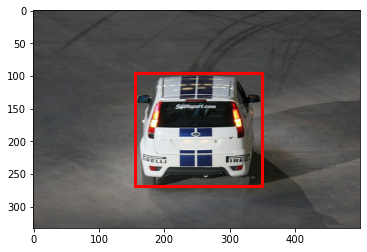

In [5]:
pascal_it = iter(pascal_data)
img, gt_boxes, gt_box_classes = next(pascal_it)
draw_bb(img, gt_boxes)

이는 물체(자동차)의 위치와 크기를 고려한 ground truth 바운딩 박스를 나타낸 것입니다. 이를 직접 출력해보면 다음과 같이 나오게 됩니다.  

__Expected output:<br>[[115 96 350 269]]<br>(1, 4)__

In [6]:
### Our ground truth box
print(gt_boxes)
print(gt_boxes.shape)

[[155  96 350 269]]
(1, 4)


이제 IoU를 구하기 위하여 모델이 예측한 바운딩 박스가 있어야 합니다. 실제 모델을 구현하여 예측 바운딩 박스를 만드는 것은 다음 챕터에서 할 것이고, 지금은 간단히 임의의 바운딩 박스를 만들어보도록 하겠습니다. 이때, 예측된 바운딩 박스는 박스의 꼭지점을 나타내는 좌표 정보와 각 박스가 물체를 잘 탐지했을 확률을 confidence 혹은 predicted score라고 합니다.

In [7]:
### Assume we have following predictions from network
predicted_boxes = np.zeros((4, 4), dtype=np.int32)
predicted_boxes[0, :] = [100, 80, 320, 240]
predicted_boxes[1, :] = [50, 40, 160, 120]
predicted_boxes[2, :] = [200, 150, 300, 300]
predicted_boxes[3, :] = [250, 50, 450, 250]

### Predicted_scores means confidence score
predicted_scores = np.array([0.9, 0.8, 0.7, 0.6])

print(predicted_boxes)
print(predicted_boxes.shape)

[[100  80 320 240]
 [ 50  40 160 120]
 [200 150 300 300]
 [250  50 450 250]]
(4, 4)


이를 시각화 하기 위해서 이전에 구현한 draw_bb2 함수를 사용하여 보도록 하겠습니다. Ground truth 바운딩 박스는 빨간색, 예측된 바운딩 박스는 초록색으로 표기됩니다.

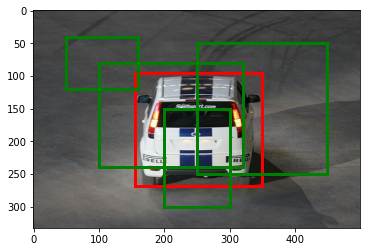

In [8]:
draw_bb2(img, gt_boxes, predicted_boxes)

In [9]:
### Convert to pytorch tensors
gt_boxes = torch.from_numpy(gt_boxes).float()
predicted_boxes = torch.from_numpy(predicted_boxes).float()
predicted_scores = torch.from_numpy(predicted_scores).float()
print(predicted_boxes)

tensor([[100.,  80., 320., 240.],
        [ 50.,  40., 160., 120.],
        [200., 150., 300., 300.],
        [250.,  50., 450., 250.]])


이제 IoU를 구하는 코드를 구현해보도록 하겠습니다. IoU를 구하는 것은 크게 3 단계로 생각할 수 있습니다.  

1. 교집합 영역 구하기 (intersection area)
2. 각 바운딩 박스 영역 구하기
3. IoU = intersection / (box1+box2 - intersection)

In [10]:
def bbox_iou(box1, box2):
    """
    Returns the IoU of two bounding boxes 
    box 1 : (1, 4) shaped pytorch tensors - sinlge GT bounding box
    box 2 : (N, 4) shaped pytorch tensors - multiple predictions from network
    """
    b1_x1, b1_y1, b1_x2, b1_y2 = box1[:,0], box1[:,1], box1[:,2], box1[:,3]
    b2_x1, b2_y1, b2_x2, b2_y2 = box2[:,0], box2[:,1], box2[:,2], box2[:,3]
    
    ### Intersection rectangle coordinate
    ### Return (1,4) tensor
    inter_rect_x1 = torch.max(b1_x1, b2_x1)
    inter_rect_y1 = torch.max(b1_y1, b2_y1) 
    inter_rect_x2 = torch.min(b1_x2, b2_x2)
    inter_rect_y2 = torch.min(b1_y2, b2_y2)
    
    ### Practice
    ### Clamps all elements in input into the range [min, max]
    inter_area = torch.clamp(inter_rect_x2-inter_rect_x1, min=0.)\
            * torch.clamp(inter_rect_y2-inter_rect_y1, min=0.) 
                 
    
    ### Calculate IoU
    area_1 = (b1_x2-b1_x1) * (b1_y2-b1_y1)
    area_2 = (b2_x2-b2_x1) * (b2_y2-b2_y1)
    iou = inter_area/(area_1+area_2-inter_area)
    
    return iou

이제 구현한 코드로 IoU를 구해보도록 하겠습니다. bbox_iou 함수는 각 예측된 바운딩 박스의 IoU를 구해줍니다. 계산된 IoU는 성공적으로 물체를 탐지한 성능을 표현하며, 이를 통해서 올바르게 예측된 바운딩 박스를 thresholding을 통해 선택해낼 수 있게 됩니다.

__Expected output:<br>tensor([0.5260, 0.0028, 0.3231, 0.2640])__

In [11]:
### Get IoU score for each prediction boxes
IoUs = bbox_iou(gt_boxes, predicted_boxes)

print(IoUs)

tensor([0.5260, 0.0028, 0.3231, 0.2640])


먼저 예시로 0.5를 기준으로 Thresholding을 해보도록 하겠습니다. 앞서 계산한 IoU 값을 보면, 첫번째 박스(index 0)만 표시될 것임을 알 수 있습니다.

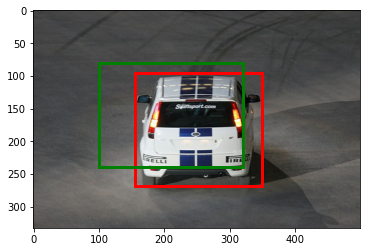

In [12]:
threshold = 0.5
### Find indices where condition is True
th = np.where(IoUs.numpy() > threshold)
th_boxes = predicted_boxes[th]
draw_bb2(img, gt_boxes, th_boxes)

다른 예시로 0.3으로 thresholding 했을 때의 모습입니다. 이런식으로, 머신러닝 네트워크를 통해 얻게되는 여러 개의 후보 바운딩 박스들 중에서 실제로 유효한 것을 선택하는 작업이 필요하기도 하고, 모델의 성능 평가 지표로서도 사용될 수 있습니다.

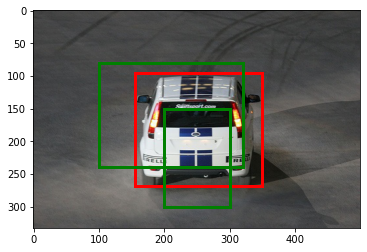

In [13]:
threshold = 0.3
th = np.where(IoUs.numpy() > threshold)
th_boxes = predicted_boxes[th]
draw_bb2(img, gt_boxes, th_boxes)

### 실습을 위한 Kitti Dataset 준비

오늘은 실습에 사용될 데이터를 먼저 다운받아놓고 진행하도록 하겠습니다. 저희가 사용할 데이터는 Kitti (Karlsruhe Institute of Technology and Toyota Technological Institute) 데이터셋 입니다. 이는 자율주행자동차 등의 계발을 위한 traffic 영상 데이터입니다. 먼저 아래 코드를 실행하여 다운로드 한 후 출력을 하여 확인해보도록 하겠습니다.

In [ ]:
# # Downloading dataset from google drive, 밑의 코드의 주석을 풀면 구글 드라이브로 부터 데이터셋 다운, 압축이 풀리고, Kitti라는 폴더가 생성됩니다. 

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=19EiycfOQtf6uDKvMgwlHZB50cAxX_U4z' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19EiycfOQtf6uDKvMgwlHZB50cAxX_U4z" -O Kitti.zip && rm -rf /tmp/cookies.txt
# 만약 zsh:1: command not found: wget 과 같은 에러가 발생한다면 wget 페키지가 설치되지 않아서 발생하는 것입니다.
# 이는 [conda install -c anaconda wget] 명령어로 설치할 수 있습니다.
!unzip Kitti.zip -d ./Kitti


이제 다운로드하고 압축해제(unzip)까지 완료한 데이터를 확인해보겠습니다. Kitti 데이터셋은 전체 데이터를 train, test, validation로 나누기 위해 파일명을 담은 txt 파일을 각각 가지고 있습니다. 한 예시로 저희는 train.txt 파일을 읽어보면 같은 영상에 대한 영상과 label된 영상이 있음을 확인할 수 있습니다.

In [14]:
import os.path as osp
imgsets_file = osp.join('./Kitti', '{}.txt'.format('train'))

counter = 0
for line in open(imgsets_file):
    line = line.strip()
    line = line.split()
    
    if counter == 20: break
    else:
        print(line)
        counter+=1

['training/image_2/um_000000.png', 'training/gt_image_2/um_road_000000.png']
['training/image_2/um_000001.png', 'training/gt_image_2/um_road_000001.png']
['training/image_2/um_000002.png', 'training/gt_image_2/um_road_000002.png']
['training/image_2/um_000003.png', 'training/gt_image_2/um_road_000003.png']
['training/image_2/um_000004.png', 'training/gt_image_2/um_road_000004.png']
['training/image_2/um_000005.png', 'training/gt_image_2/um_road_000005.png']
['training/image_2/um_000006.png', 'training/gt_image_2/um_road_000006.png']
['training/image_2/um_000007.png', 'training/gt_image_2/um_road_000007.png']
['training/image_2/um_000008.png', 'training/gt_image_2/um_road_000008.png']
['training/image_2/um_000009.png', 'training/gt_image_2/um_road_000009.png']
['training/image_2/um_000010.png', 'training/gt_image_2/um_road_000010.png']
['training/image_2/um_000011.png', 'training/gt_image_2/um_road_000011.png']
['training/image_2/um_000012.png', 'training/gt_image_2/um_road_000012.png']

In [15]:
import PIL
import torch
import numpy as np


class KITTIdataset(torch.utils.data.Dataset):
    class_names = np.array(['background', 'road'])

    def __init__(self, root, transform, split='train'): # root: "./Kitti"
        self.root = root
        self.split = split
        self.transform = transform

        self.image_path = []
        self.ys = []
        
        imgsets_file = osp.join(root, '{}.txt'.format(split))
        for did in open(imgsets_file):
            did = did.strip()
            did = did.split()
            img_file = osp.join(root, 'data_road/{}'.format(did[0]))
            lbl_file = osp.join(root, 'data_road/{}'.format(did[1]))
            self.image_path.append(img_file)
            self.ys.append(lbl_file)

    def __len__(self):
        return len(self.ys)

    def __getitem__(self, index):
        # load image
        img_file = self.image_path[index]
        img = PIL.Image.open(img_file)
        # img = np.array(img)
        
        # load label
        lbl_file = self.ys[index]
        lbl = PIL.Image.open(lbl_file)
        lbl = self.transform(lbl)
        lbl = np.array(lbl)
        lbl[lbl == 255] = 1 # 0 is black 255 is white
        
        return self.transform(img), torch.from_numpy(lbl).long()

In [16]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.Resize((128,256)), transforms.ToTensor()])

train_dataset = KITTIdataset("./Kitti", transform, split='train')
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)


위와 같은 방법으로 test_dataset을 만들어보세요. 또한, 만들어진 데이터셋의 크기를 확인하여 train과 test 데이터셋에는 각각 몇개의 데이터가 들어가있는지 확인해보세요.  
(test dataset에 사용할 데이터는 validation 데이터를 사용할 것입니다. split='val'을 사용하세요.)

In [17]:
transform = transforms.Compose([transforms.Resize((128,256)), transforms.ToTensor()])

test_dataset = KITTIdataset("./Kitti", transform, split='val')
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

__Expected output:<br>241<br>48__

In [18]:
print(len(train_dataset))
print(len(test_dataset))

241
48


다음은 아주 중요한 과정입니다. 이전 CV_ML.ipynb에서와 마찬가지로 데이터가 제대로 구성되어있는지 확인하는 작업입니다. 만약 이 과정을 거치지 않고 빠르게 넘어간다면, 데이터가 잘못된 순서로 들어가 있다거나 아예 다른 데이터가 들어가게 되어 나중에 학습을 하는 가운데 엉뚱한 결과가 나오게 될 수 있습니다. 그렇게 된다면 error를 잡기 위해서 model architecture을 고친다거나 loss function & optimizer를 수정하는 등의 불필요한 시간을 많이 소비하게 될 수 있습니다.

먼저 우리는 영상 데이터를 사용하기 때문에 이를 시각화하여 확인할 수 있습니다.
matplotlib.pyplot과 torchvision.transforms.functional.to_pil_image를 사용하여 아래 이미지와 같이 출력되도록 코딩해보세요.

__Expected output:__

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/kitti_sample.png?raw=true" title="iou" width=1024 height=512>
</figure>

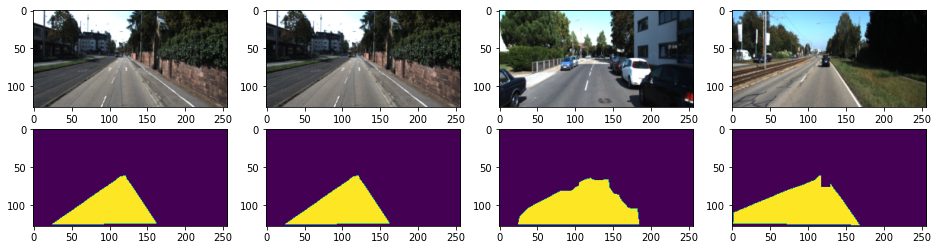

In [19]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

plt.figure(figsize=(16,4))
for i in range(4):
    img = to_pil_image(train_dataset[i**i][0])
    gt = to_pil_image(train_dataset[i**i][1].float())
    plt.subplot(2,4,i+1)
    plt.imshow(img)
    plt.subplot(2,4,i+5)
    plt.imshow(gt)
plt.show()

# Semantic Segmentation using machine learning
## Image Segmentation 발전 과정

지난 CV_ML.ipynb에서 Image Classification에 대해 살펴보았습니다. Classification은 일반적으로 Convolution Layer를 통해 영상의 Feature들을 뽑아낸 후, fully connected layer를 통하여 최종 출력 결과를 얻게됩니다. 지난 자료에서 함께 구현해본 Encoder model이 그에 해당합니다 (Figure 5). 이는 후보가 되는 몇가지의 클래스/레이블 중 어떤 것에 해당하는지 예측하는 것이기 때문에 최종 출력 노드를 후보 클래스 n개만 설정하면 되기 때문에 fully connected layer를 사용합니다.

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/encoder.png?raw=true" title="encoder" width=600 height=512>    
    <center><figcaption>Figure5. Encoder model architecture</figcaption><center>
</figure>

하지만, 우리가 하려는 Image Segmentation의 경우, 각 픽셀마다 예측된 클래스 정보를 가지고 있어야 하게 됩니다. 그렇다면 기존 Classification과 같이 fully connected layer로 최종 출력 노드의 수를 총 픽셀의 수로 하면 되지 않을까요? 아쉽게도 그렇지 않습니다. Fully connected layer는 영상이 갖는 픽셀들의 위치 정보를 잃어버리는 flatten 작업이 들어가기 때문입니다. 따라서, 이러한 문제를 해결하기 위하여 fully connected 구조가 아닌 convolution을 마지막까지 하는 방식인 Fully Convolutional Network가 나오게 되었습니다.

### Fully Convolutional Network (FCN)
Jonathan et al., Fully convolutional networks for semantic segmentation, CVPR 2015

FCN은 기존에 Classification에 사용되던 Encoder 모델을 기반으로 개발되었습니다. 먼저 FCN 모델은 다음과 같은 구조를 갖습니다.

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/conventional.png?raw=true" title="fclayer" width=700 height=512>    
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/fcn1.png?raw=true" title="FCN" width=700 height=512>    
    <center><figcaption>Figure6. Fully Convolutional Network(FCN). FCN use convolution instead of fully connected layer. </figcaption><center>
</figure>

Figure 6에서 위에는 기존 classification에 사용되던 Encoder 모델에 해당하고, 그 아래는 FCN 모델의 구조를 나타냅니다. FCN에서는 기존에 있던 fully connected layer를 전부 convolution으로 대체하였고, 이 과정을 _convolutionalization_ 이라고 부릅니다. 먼저 간단한 실습으로 FCN 모델을 구현해보도록 하겠습니다. 아래에 있는 이전 강의에서 배운 Encoder 모델 코드를 참고하여 구현해보세요.

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/fcn_part1.png?raw=true" title="FCN" width=600 height=512>    
    <center><figcaption>Figure7. Fully Convolutional Network(FCN) (not completed). </figcaption><center>
</figure>

```python
class Encoder(nn.Module):
    def __init__(self, in_ch, hid_ch, out_ch,):
        super(Encoder, self).__init__()
        
        self.layer1 = nn.Sequential(nn.Conv2d(in_ch, hid_ch//4, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch//4),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = nn.Sequential(nn.Conv2d(hid_ch//4, hid_ch//2, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch//2),
                                    nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(nn.Conv2d(hid_ch//2, hid_ch, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch),
                                    nn.MaxPool2d(kernel_size=2, stride=2))        
        
        self.conv_layer = nn.Sequential(nn.Conv2d(hid_ch, hid_ch, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch))
        
        self.fc_layer = nn.Linear(128*32*16,40)
        
        nn.init.kaiming_uniform_(self.fc_layer.weight.data)
        
    def forward(self, x):
        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        x4 = self.conv_layer(x3)
        
        out = self.fc_layer(x4.view((x4.shape[0],-1)))

        return out
```

In [20]:
import torch.nn as nn

class FCN(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(FCN, self).__init__()
        
        self.layer1 = nn.Sequential(nn.Conv2d(in_ch, 32, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=32),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=64),
                                    nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=128),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer4 = nn.Sequential(nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=256),
                                    nn.MaxPool2d(kernel_size=2, stride=2)) 
        
        self.conv_layer = nn.Sequential(nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=256))
        
    def forward(self, x):
        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        x4 = self.layer4(x3)
        x5 = self.conv_layer(x4)
        
        out = x5
        
        return out

이제 구현한 FCN 모델을 <code>from torchsummary import summary</code> 페키지를 사용하여 그 구조를 자세히 살펴보도록 하겠습니다. 예시로 사용하는 데이터는 3개의 채널(RGB)를 갖는 (128,256) 크기의 영상 1개라고 가정하겠습니다.

__Expected output:__

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/fcn_summary1.png?raw=true" title="FCN Summary" width=400 height=400>
</figure>

In [21]:
from torchsummary import summary

model = FCN(3, 2)
summary(model,(3,128,256),batch_size=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 32, 128, 256]             896
              ReLU-2          [1, 32, 128, 256]               0
       BatchNorm2d-3          [1, 32, 128, 256]              64
         MaxPool2d-4           [1, 32, 64, 128]               0
            Conv2d-5           [1, 64, 64, 128]          18,496
              ReLU-6           [1, 64, 64, 128]               0
       BatchNorm2d-7           [1, 64, 64, 128]             128
         MaxPool2d-8            [1, 64, 32, 64]               0
            Conv2d-9           [1, 128, 32, 64]          73,856
             ReLU-10           [1, 128, 32, 64]               0
      BatchNorm2d-11           [1, 128, 32, 64]             256
        MaxPool2d-12           [1, 128, 16, 32]               0
           Conv2d-13           [1, 256, 16, 32]         295,168
             ReLU-14           [1, 256,

위와 같은 형태의 FCN은 한가지 문제가 있습니다. 우리는 최종 결과물로 기존 영상과 같은 크기(128,256)의 결과 영상을 얻으려고 하지만, 현재 결과는 256개의 채널을 갖는 8x16크기를 갖습니다. 따라서, 이를 원래 크기로 복원해주는 작업이 필요합니다.  

이번엔 최종적인 FCN 모델을 구현해보도록 하겠습니다. 마지막 convolution 이후, Transposed Convolution 이라는 것을 통하여 채널수의 감소와 영상의 크기를 키울 수 있습니다. Figure 9은 최종적인 FCN 모델을 나타낸 것입니다. 마지막 과정에 Transposed Convolution을 진행하여 다시 크기를 키우는 것을 볼 수 있습니다. 그렇다면 Transposed Convolution이라는 것은 도대체 무엇이고, 왜 최종 결과물의 채널 수는 2가 되었을까요?

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/deconvolution.png?raw=true" title="trans_conv" width=700 height=512>    
    <center><figcaption>Figure8. Transposed Convolution (= Deconvolution). </figcaption><center>
</figure>

Transposed Convolution은 Deconvolution이라고도 불리며, 가장 쉽게 표현하자면 Convolution의 반대 작용이라고 생각할 수 있습니다. 기존 Convolution은 고정된 크기의 kernel을 학습시켜서 결과물이 원영상의 크기보다 작아지면서 더 많은 feature 수를 가질 수 있게 합니다. 이와 비슷하지만 반대로, Transposed Convolution은 고정된 크기의 kernel을 학습시켜서 결과물이 원영상보다 커지면서 feature 수를 줄일 수 있게 됩니다. Figure 8을 참고하면 조금 더 쉽게 이해할 수 있을 것 같습니다. 

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/fcn_part2.png?raw=true" title="FCN" width=600 height=512>    
    <center><figcaption>Figure9. Fully Convolutional Network(FCN) (completed). </figcaption><center>
</figure>

In [22]:
class FCN(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(FCN, self).__init__()
        
        self.layer1 = nn.Sequential(nn.Conv2d(in_ch, 32, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=32),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=64),
                                    nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=128),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer4 = nn.Sequential(nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=256),
                                    nn.MaxPool2d(kernel_size=2, stride=2)) 
        
        self.conv_layer = nn.Sequential(nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=256))
        
        self.trans_conv_layer1 = nn.ConvTranspose2d(256, 2, kernel_size=16, stride=16, bias=False)
        self.softmax = nn.Softmax2d()
        
        
    def forward(self, x):
        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        x4 = self.layer4(x3)
        x5 = self.conv_layer(x4)
        
        out = self.trans_conv_layer1(x5)
        out = self.softmax(out)

        return out

이제 구현한 FCN의 구조를 다시 한번 살펴보도록 하겠습니다. 성공적으로 입력 영상과 출력 영상의 크기가 같은지 확인해보세요.

__Expected output:__

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/fcn_summary2.png?raw=true" title="FCN Summary" width=400 height=400>
</figure>

In [23]:
from torchsummary import summary

model = FCN(3, 2)
summary(model,(3,128,256),batch_size=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 32, 128, 256]             896
              ReLU-2          [1, 32, 128, 256]               0
       BatchNorm2d-3          [1, 32, 128, 256]              64
         MaxPool2d-4           [1, 32, 64, 128]               0
            Conv2d-5           [1, 64, 64, 128]          18,496
              ReLU-6           [1, 64, 64, 128]               0
       BatchNorm2d-7           [1, 64, 64, 128]             128
         MaxPool2d-8            [1, 64, 32, 64]               0
            Conv2d-9           [1, 128, 32, 64]          73,856
             ReLU-10           [1, 128, 32, 64]               0
      BatchNorm2d-11           [1, 128, 32, 64]             256
        MaxPool2d-12           [1, 128, 16, 32]               0
           Conv2d-13           [1, 256, 16, 32]         295,168
             ReLU-14           [1, 256,

자 이제 우리가 구현한 FCN 모델을 학습시켜보도록 하겠습니다. 이전에 저희가 함께 구현한 IoU 계산 함수와는 조금 다른 방식으로, 보다 효율적으로 작성한 mIoU 계산 함수를 제공하였습니다. 관심이 있으신 학습자분들은 자세히 코드를 읽어보며 익히시면 도움이 될 것입니다.

In [24]:
def _fast_hist(label_true, label_pred, n_class):
    mask = (label_true >= 0) & (label_true < n_class)
    hist = np.bincount(
        n_class * label_true[mask].astype(int) +
        label_pred[mask], minlength=n_class**2).reshape(n_class, n_class)
    return hist

def compute_mean_iou(label_trues, label_preds, n_class):
    hist = np.zeros((n_class, n_class))
    for lt, lp in zip(label_trues, label_preds):
        hist += _fast_hist(lt.flatten(), lp.flatten(), n_class)
    iu = np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist))
    mean_iou = np.nanmean(iu)
    
    return mean_iou

머신러닝 모델의 학습은 이전 강의들과 코드랩 자료들에서 한 것과 비슷합니다. 아래에 있는 코드를 참고하여 FCN을 학습시키는 코드를 구현해보세요.  
(optimizer는 Adam, loss function은 cross entropy loss를 사용하세요.)

```python
import torch.optim as optim
import numpy as np

model = FCN(3,2)
optimizer = # Optimizer
loss_function = # Loss function

for i in range(10):
    print("Epoch ", i+1)
    
    model.train()
    print("###Training###")
    for X_train, Y_train in train_dataloader:
        pred = model(X_train)
        loss = loss_function(pred, Y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
    model.eval()
    print("\n###Validation###")
    mious = []
    for X_val, Y_val in test_dataloader:
        pred = model(X_val)
        lbl_pred = torch.argmax(pred, dim=1)
        mious.append(compute_mean_iou(lt, lp, 2))
                    
    print("Final miou:", end=" ")
    print(np.mean(mious))
```

In [25]:
import torch.optim as optim
import numpy as np

model = FCN(3,2)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.00001)
loss_function = nn.CrossEntropyLoss()

for i in range(10):
    print("Epoch ", i+1)
    
    model.train()
    print("###Training###")
    count = 0
    for X_train, Y_train in train_dataloader:
        pred = model(X_train)
        loss = loss_function(pred, Y_train.squeeze(1))
        if count%20==0: print(loss.item(), end=' | ')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count+=1
    
    model.eval()
    print("\n###Validation###")
    mious = []
    for X_val, Y_val in test_dataloader:
        pred = model(X_val)
        lbl_pred = torch.argmax(pred, dim=1)
        lbl_pred = lbl_pred.numpy()
        lbl_true = Y_val.numpy()

        miou = 0.0
        for lt, lp in zip(lbl_true.squeeze(1), lbl_pred): # lbl_true, lbl_pred: [batch, h, w]
            miou += compute_mean_iou(lt, lp, 2)
        mious.append(miou)
                    
    print("Final miou:", end=" ")
    print(np.mean(mious))

Epoch  1
###Training###
0.7016634345054626 | 0.6525083780288696 | 0.6127024292945862 | 0.6669992804527283 | 0.46549421548843384 | 0.4916384816169739 | 0.46626996994018555 | 0.40417104959487915 | 0.45246782898902893 | 0.3994074761867523 | 0.42538103461265564 | 0.3996798098087311 | 0.40787655115127563 | 
###Validation###
Final miou: 0.7417152950719718
Epoch  2
###Training###
0.45284998416900635 | 0.4547981917858124 | 0.4201523959636688 | 0.35372060537338257 | 0.4515987038612366 | 0.38290148973464966 | 0.38296329975128174 | 0.3852364420890808 | 0.36987805366516113 | 0.39406171441078186 | 0.43430858850479126 | 0.41210195422172546 | 0.4026467204093933 | 
###Validation###
Final miou: 0.7574669999240613
Epoch  3
###Training###
0.3558417558670044 | 0.3812975287437439 | 0.4052075445652008 | 0.3553014397621155 | 0.37095320224761963 | 0.36003732681274414 | 0.3499719500541687 | 0.3524383008480072 | 0.37090882658958435 | 0.34156307578086853 | 0.34667715430259705 | 0.35334792733192444 | 0.3738963603

이와 같이 FCN을 사용하여 성공적으로 학습이 진행되었음을 확인할 수 있습니다.

### U-Net

U-Net: Convolutional Networks for Biomedical Image Segmentation, Olaf Ronneberger, Philipp Fischer, Thomas Brox, MICCAI 2015  

U-Net은 의료영상에서의 Image Segmentation을 위해 개발된 네트워크 모델입니다. Figure 10에서 회색 화살표로 표시된 것은 _Skip Connection_ 이라고 부르는 작업으로, 왼쪽에 있던 고화질의 영상을 오른쪽에 있는 저화질 영상에 합쳐서 보다 더 좋은 품질의 영상 feature를 뽑아낼 수 있도록 하게 됩니다. 이는 원영상의 정보 손실을 최소화 해야 한다는 의료 영상 처리에서 아주 중요한 문제를 간단한 방법으로 개선한 획기적인 방법론으로, 현재 다양한 머신러닝 모델에 많이 쓰이는 기술이 되었습니다. 그렇다면 왼쪽, 오른쪽, 고화질, 저화질 등의 의미는 무엇일까요? 보다 더 자세히 설명해보도록 하겠습니다.

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/unet.png?raw=true" title="unet" width=512 height=512>    
    <center><figcaption>Figure10. Architecture of U-Net</figcaption><center>
</figure>

앞서 설명한 Skip Connection이 없다면 U-Net은 단순한 Encoder-Decoder 모델로 생각할 수 있습니다. Convolution과 pooling을 거쳐 영상을 축소시키며 풍부한 feature를 뽑아내는 Encoder 부분과, Up-convolution을 통해 다시금 영상의 크기를 복구시키고 feature를 압축하는 Decoder로 이루어지게 됩니다. 하지만, 영상의 크기를 복구시키기 위하여 작은 영상을 강제로 키우게 된다면 화질이 급격히 안좋아지게 될 것입니다. 간단한 예로, 우리가 컴퓨터에서 영상을 과도하게 크게 만들면 픽셀들의 변화가 부드럽지 않고 끊어지는 듯한 현상을 볼 수 있게 됩니다. 이와 같이, Decoder 과정에서 Up-convolution을 하게 되면 아무리 잘 학습된 convolution을 진행하더라도 원영상과는 훨씬 좋지 않은 저화질의 결과를 얻게 됩니다. 그러나, 의료영상처리와 같은 분야는 영상의 정보 손실은 최소화 되어야 한다는 점이 굉장히 중요합니다. 따라서 U-Net에서는 Encoder 단계에서 같은 위치/크기에 있는 feature map을 그대로 가져와 합쳐서 convolution을 하는 직관적이면서도 좋은 성능의 방법론을 제시하였습니다.

이제 이러한 U-Net을 구현해보도록 하겠습니다.

In [26]:
# example code for U-Net

class UNet(nn.Module):
    def __init__(self, in_ch, hid_ch, out_ch,):
        super(UNet, self).__init__()
        
        self.down_layer1 = nn.Sequential(nn.Conv2d(in_ch, hid_ch//8, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch//8))
        self.pool_layer1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.down_layer2 = nn.Sequential(nn.Conv2d(hid_ch//8, hid_ch//4, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch//4))
        self.pool_layer2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.down_layer3 = nn.Sequential(nn.Conv2d(hid_ch//4, hid_ch//2, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch//2))
        self.pool_layer3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.mid_layer = nn.Sequential(nn.Conv2d(hid_ch//2, hid_ch, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch))
        
        
        self.up_layer1 = nn.Sequential(nn.ConvTranspose2d(hid_ch, hid_ch, kernel_size=3, stride=2, padding=1, output_padding=1),
                                    nn.Conv2d(hid_ch, hid_ch//2, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch//2))
        self.up_layer2 = nn.Sequential(nn.ConvTranspose2d(hid_ch, hid_ch, kernel_size=3, stride=2, padding=1, output_padding=1),
                                    nn.Conv2d(hid_ch, hid_ch//4, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch//4))
        self.up_layer3 = nn.Sequential(nn.ConvTranspose2d(hid_ch//2, hid_ch//8, kernel_size=3, stride=2, padding=1, output_padding=1),
                                    nn.Conv2d(hid_ch//8, out_ch, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=out_ch))
        
        self.softmax = nn.Softmax2d()
                
    def forward(self, x):
        x = self.down_layer1(x)
        x1 = self.pool_layer1(x)
        x1 = self.down_layer2(x1)
        x2 = self.pool_layer2(x1)
        x2 = self.down_layer3(x2)
        x3 = self.pool_layer3(x2)
        
        x4 = self.mid_layer(x3)
        
        x5 = self.up_layer1(x4)
        x6 = self.up_layer2(torch.cat((x5, x2), dim=1))
        out = self.up_layer3(torch.cat((x6, x1), dim=1))
        
        out = self.softmax(out)
        
        return out

__Expected output:__

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/unet_summary.png?raw=true" title="UNet Summary" width=400 height=400>
</figure>

In [27]:
model = UNet(3,256,2)
summary(model,(3,128,256),batch_size=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 32, 128, 256]             896
              ReLU-2          [1, 32, 128, 256]               0
       BatchNorm2d-3          [1, 32, 128, 256]              64
         MaxPool2d-4           [1, 32, 64, 128]               0
            Conv2d-5           [1, 64, 64, 128]          18,496
              ReLU-6           [1, 64, 64, 128]               0
       BatchNorm2d-7           [1, 64, 64, 128]             128
         MaxPool2d-8            [1, 64, 32, 64]               0
            Conv2d-9           [1, 128, 32, 64]          73,856
             ReLU-10           [1, 128, 32, 64]               0
      BatchNorm2d-11           [1, 128, 32, 64]             256
        MaxPool2d-12           [1, 128, 16, 32]               0
           Conv2d-13           [1, 256, 16, 32]         295,168
             ReLU-14           [1, 256,

In [28]:
import torch.optim as optim
import numpy as np

model = UNet(3,256,2)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.00001)
loss_function = nn.CrossEntropyLoss()

for i in range(10):
    print("Epoch ", i+1)
    
    model.train()
    print("###Training###")
    count = 0
    for X_train, Y_train in train_dataloader:
        pred = model(X_train)
        loss = loss_function(pred, Y_train.squeeze(1))
        if count%20==0: print(loss.item(), end=' | ')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count+=1
    
    model.eval()
    print("\n###Validation###")
    mious = []
    for X_val, Y_val in test_dataloader:
        pred = model(X_val)
        lbl_pred = torch.argmax(pred, dim=1)
        lbl_pred = lbl_pred.numpy()
        lbl_true = Y_val.numpy()

        miou = 0.0
        for lt, lp in zip(lbl_true.squeeze(1), lbl_pred): # lbl_true, lbl_pred: [batch, h, w]
            miou += compute_mean_iou(lt, lp, 2)
        mious.append(miou)
                    
    print("Final miou:", end=" ")
    print(np.mean(mious))

Epoch  1
###Training###
0.7261993288993835 | 0.5325788855552673 | 0.5753921270370483 | 0.5735752582550049 | 0.5236714482307434 | 0.5603691935539246 | 0.4703175127506256 | 0.5017985105514526 | 0.44720378518104553 | 0.5226001143455505 | 0.5177218914031982 | 0.49462655186653137 | 0.4761703908443451 | 
###Validation###
Final miou: 0.774212113484908
Epoch  2
###Training###
0.4651586711406708 | 0.4825286865234375 | 0.47043368220329285 | 0.458942711353302 | 0.5149750113487244 | 0.5195682048797607 | 0.46448177099227905 | 0.5051711797714233 | 0.5249947905540466 | 0.4628193974494934 | 0.4994354844093323 | 0.5040117502212524 | 0.4810772240161896 | 
###Validation###
Final miou: 0.7960055563911199
Epoch  3
###Training###
0.4732059836387634 | 0.48322802782058716 | 0.47372961044311523 | 0.47030338644981384 | 0.5012965798377991 | 0.42953312397003174 | 0.4742431044578552 | 0.4938873052597046 | 0.5295955538749695 | 0.4888748824596405 | 0.4916701018810272 | 0.4688350260257721 | 0.43194958567619324 | 
###

# 참고자료

1. Figure1: https://www.jeremyjordan.me/semantic-segmentation/
2. Figure2: https://www.jeremyjordan.me/semantic-segmentation/
2. Figure3: https://www.jeremyjordan.me/semantic-segmentation/
4. Figure4: https://minimin2.tistory.com/144
5. Figure10: U-Net: Convolutional Networks for Biomedical Image Segmentation, Olaf Ronneberger, Philipp Fischer, Thomas Brox, MICCAI 2015